<a href="https://colab.research.google.com/github/TeoVogel/MdTyAA/blob/main/3_MTAA_Aprendizaje_Autom%C3%A1tico_No_Supervizado_Ejercicios_Entregables_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Minería de Texto y Aprendizaje Automático </center>


###<center>Aprendizaje Automático No Supervisado</center>

 <center>Dept. de Cs. e Ing. de la Comp. -- Universidad Nacional del Sur </center>

## Dataset

En esta notebook trabajaremos con el dataset conocido como [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/).

El dataset continee datos de 344 pingüinos de 3 especies diferentes (Adelie, Chinstrap y Gentoo), recopilados de 3 islas (Torgersen, Biscoe y Dream) en el Archipiélago Palmer, Antártida.





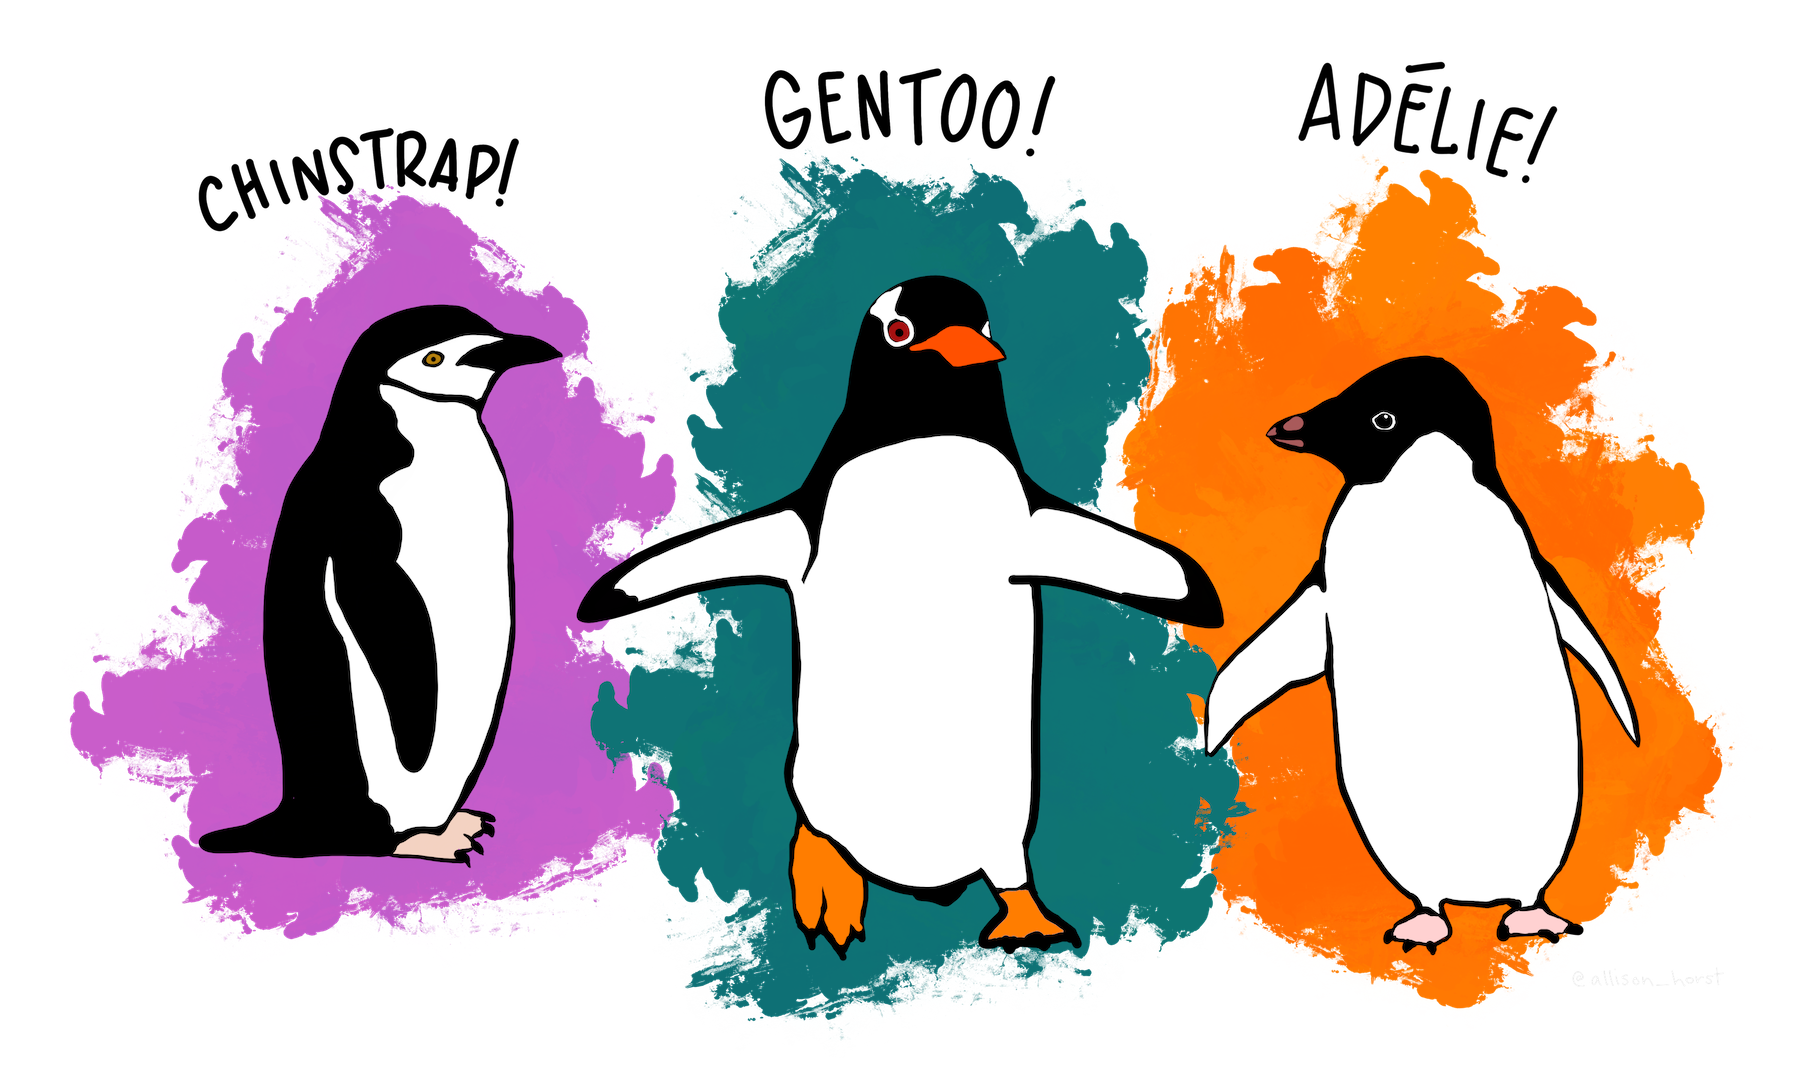

Carguemos el dataframe disponible en la biblioteca Seaborn.

In [1]:
import seaborn as sns
df = sns.load_dataset("penguins")

Analicemos el dataframe usando Pandas

In [3]:
import pandas as pd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Eliminemos las filas que contiene datos faltantes

In [5]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Veamos cuántos pingüinos hay de cada especie:

In [6]:
pd.value_counts(df.species)

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Veamos cuántos pingüinos hay de cada isla:

In [7]:
pd.value_counts(df.island)

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

Veamos si distintas especies co-habitan una misma isla

In [11]:
df.groupby(['island', 'species']).size().reset_index(name='counts')

,island,species,counts
0,Biscoe,Adelie,44
1,Biscoe,Gentoo,119
2,Dream,Adelie,55
3,Dream,Chinstrap,68
4,Torgersen,Adelie,47


Realicemos un análisis exploratorio visual con Seaborn:

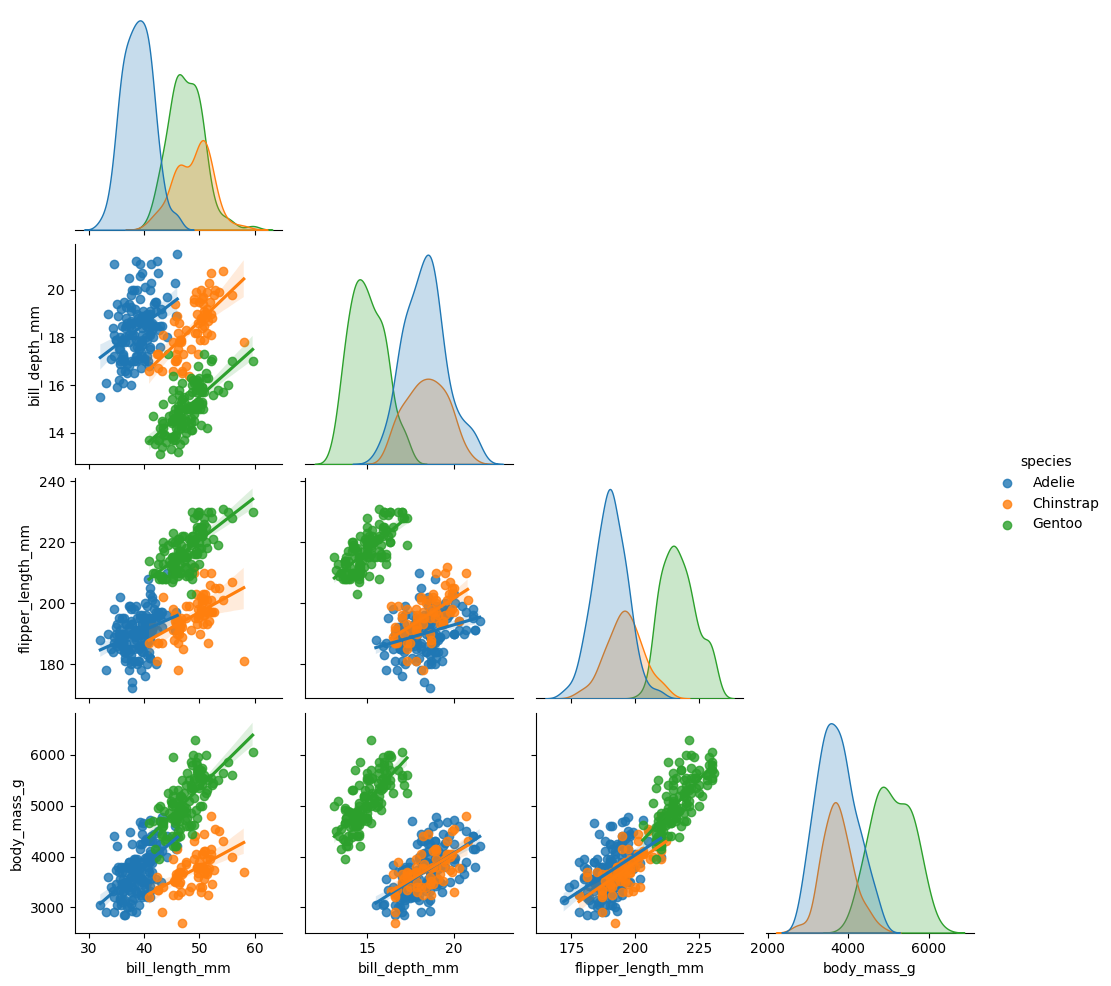

In [12]:
sns.pairplot(df, hue="species", corner=True, kind='reg')

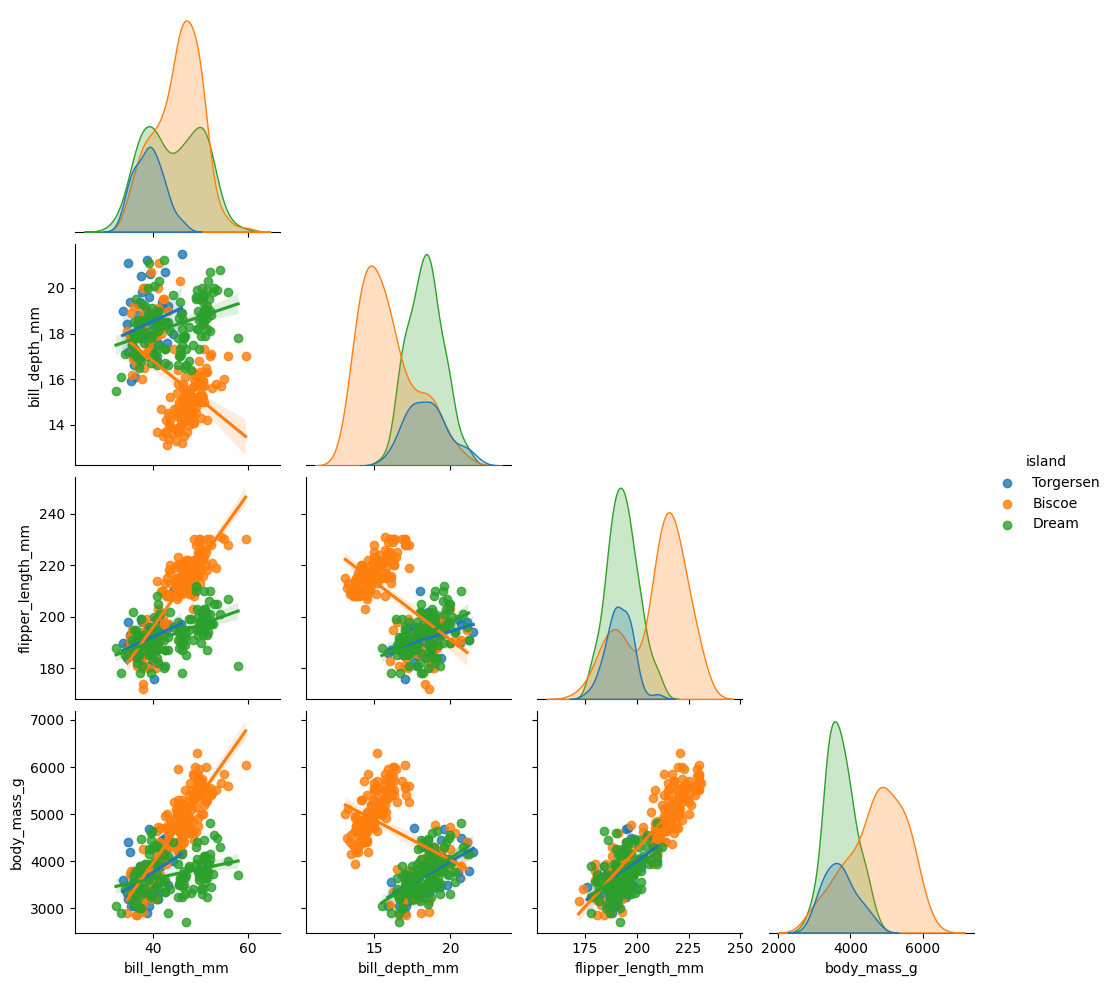

In [13]:
sns.pairplot(df, hue="island", corner=True, kind='reg')

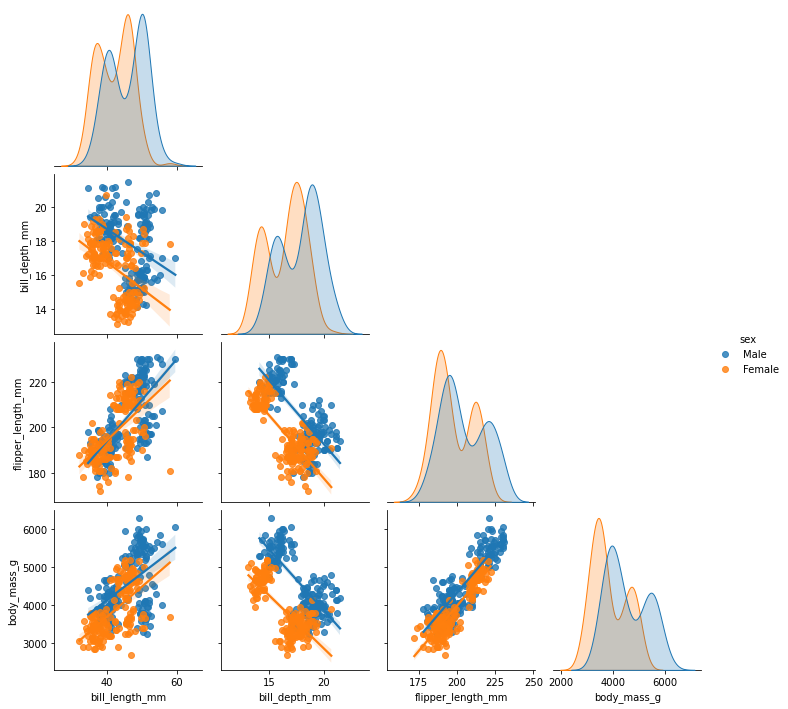

In [ ]:
sns.pairplot(df, hue="sex", corner=True, kind='reg')

## Resuelva los siguientes incisos escribiendo el código o la respuesta, según el caso.

En este trabajo práctico aplicaremos distintas estrategias de **clustering** y realizaremos una evaluación extrínseca de los resultados. Utilizaremos las métricas de *pureza* y *pureza inversa* para medir homogeneidad y completitud, respectivamente. También reportaremos la *media armónica* de estas dos métricas.
A continuación definimos las funciones necesarias para calcular estas métricas.

In [14]:
import numpy as np
from sklearn import metrics

# pureza (purity) para medir homogeneidad de cada cluster respecto a las clases definidas
def purity(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# pureza inversa (inverse_purity) para medir completitud de cada cluster respecto a las clases definidas
def inverse_purity(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)

# media armónica (harmonic_mean) entre pureza y pureza inversa
def harmonic_mean(y_true, y_pred):
    return 2*purity(y_true, y_pred)*inverse_purity(y_true, y_pred) /(purity(y_true, y_pred)+inverse_purity(y_true, y_pred))

A continuación, presentamos una serie de pasos para ejemplificar el tipo de análisis que llevaremos a cabo.

**Paso 1: Inspección de Datos.** Inspeccionamos visualmente si los atributos *bill_length_mm* y *bill_depth_mm* nos permiten crear un buen agrupamiento de *species*.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

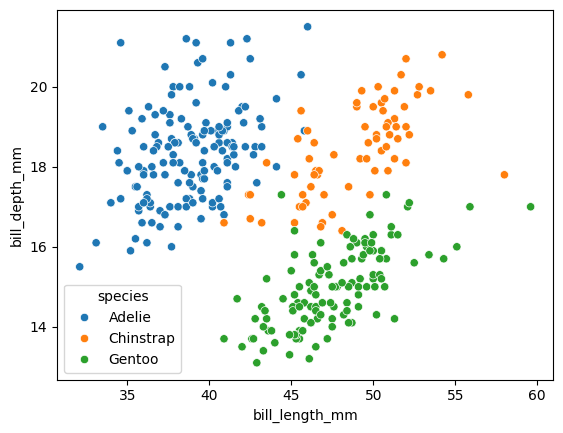

In [15]:
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = df['species'])

Tengamos en cuenta que nuestro algoritmo de clustering no tendrá acceso a la información de la etiqueta *species*, por lo que los datos de entrenamiento se pueden visualizar como sigue.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

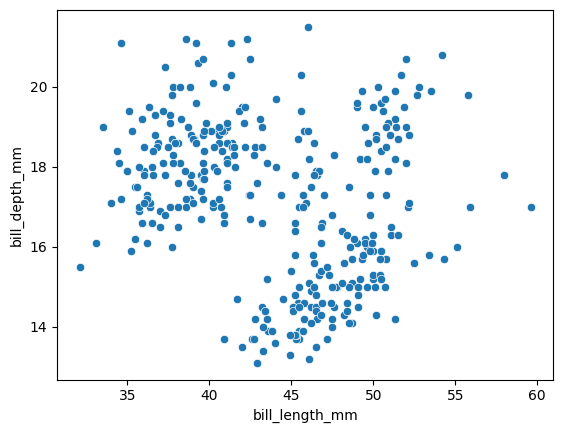

In [16]:
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'])

**Paso 2: Estandarización.** La mayoría de los algoritmos de clustering  funcionan mejor en la mayoría de los datasets si estandarizamos los atributos.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm']])

**Paso 3: Entrenamiento y Predicción.** Utilizamos ``KMeans`` disponible en ScikitLearn para agrupar los datos en 3 clusters.

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Paso 4: Evaluación Extrínseca.** Realizamos una evaluación extrínseca de los resulados obtenidos.

Contrastamos visualmente las tres clases reales según la etiqueta *species* (y_true) con los clusters generados (y_pred).

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

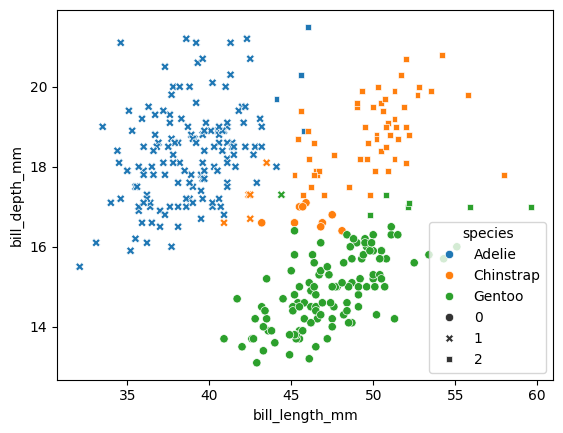

In [19]:
y_true = df['species']
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = y_true, style = y_pred )

Contrastamos las clases reales y los clusters generados mediante tabulación cruzada.

In [20]:
matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             0          9     112
1           142          5       1
2             4         54       6


Reportamos las métricas de pureza, pureza inversa y su media armónica.

In [21]:
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred))

Homogeneidad basada en pureza:  0.924924924924925
Completitud basada en pureza inversa:  0.924924924924925
Media armónica de homogeneidad y completitud:  0.924924924924925


## Resuelva los siguientes incisos escribiendo el código o la respuesta, según el caso.


---

###1.  Repita los pasos anteriores para entrenar al algoritmo ``KMeans`` utilizando los atributos *flipper_length_mm* y *body_mass_g*. ¿Qué tan efectivos son estos dos atributos para crear un agrupamiento (no supervisado) que refleje el agrupamiento real según la etiqueta *species*?





<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

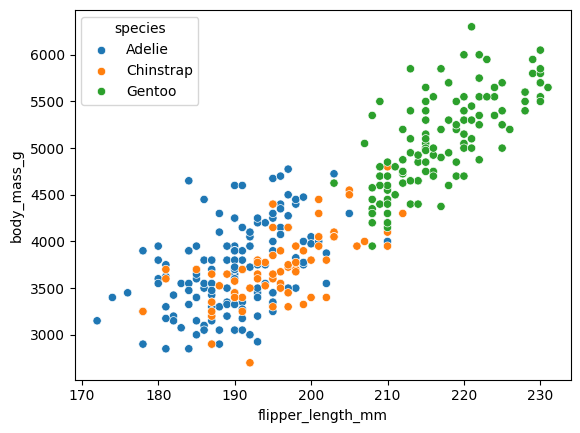

In [25]:
## Escriba aquí su código
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = df['species'])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

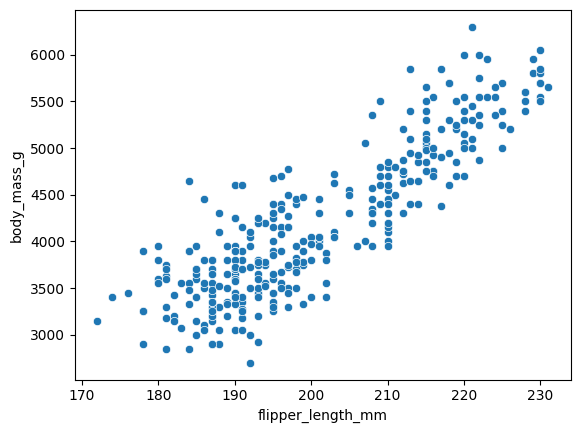

In [26]:
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

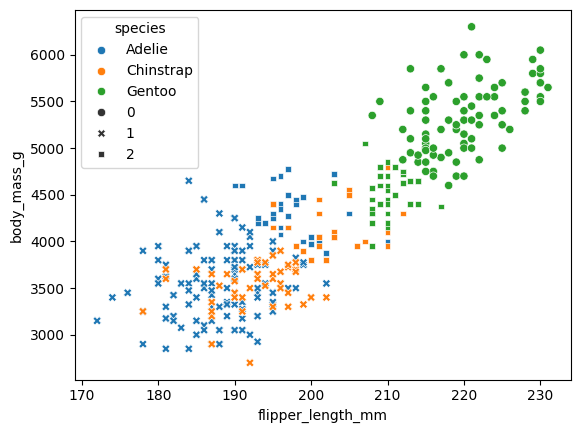

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['flipper_length_mm','body_mass_g']])
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)
y_true = df['species']
sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = y_true, style = y_pred )

In [28]:
matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             0          0      85
1           116         45       0
2            30         23      34


In [29]:
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred))

Homogeneidad basada en pureza:  0.7057057057057057
Completitud basada en pureza inversa:  0.7387387387387387
Media armónica de homogeneidad y completitud:  0.7218445056282893


**Escriba aquí su respueta:** ... poco efectivo, los puntos de Gentoo y Chinstrap terminan demasiado sobrelapados como para hacer clustering efectivamente








---
###2. Volvamos a considerar los atributos *flipper_length_mm* y *body_mass_g*. ¿Qué ocurre si el algoritmo ``KMeans`` intenta obtener 2 clusters en lugar de 3 clusters?  ¿Cómo se modifica el análsis si ``KMeans`` intenta obtener 4 clusters?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

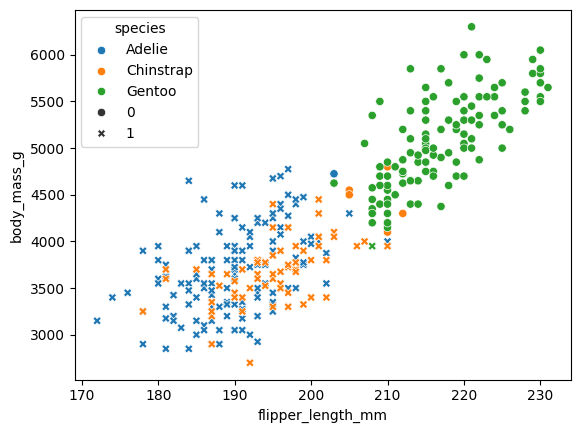

In [31]:
## Escriba aquí su código
model2 = KMeans(n_clusters=2)
y_pred2 = model2.fit_predict(X)

sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = y_true, style = y_pred2 )

In [32]:
matrix = pd.DataFrame({'labels': y_pred2, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             2          5     118
1           144         63       1


In [34]:
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred2))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred2))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred2))

Homogeneidad basada en pureza:  0.7867867867867868
Completitud basada en pureza inversa:  0.975975975975976
Media armónica de homogeneidad y completitud:  0.8712289802579412


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

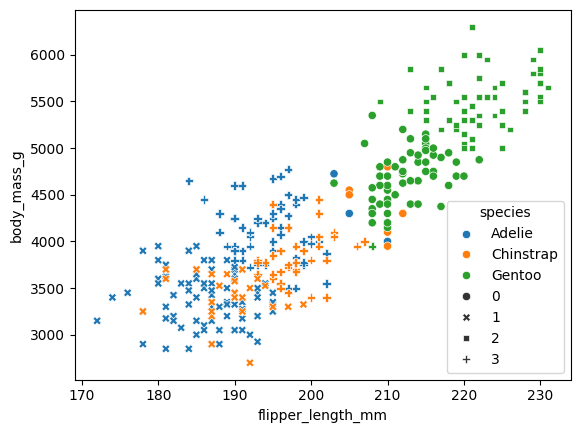

In [36]:
model3 = KMeans(n_clusters=4)
y_pred3 = model3.fit_predict(X)

sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = y_true, style = y_pred3 )

In [37]:
matrix = pd.DataFrame({'labels': y_pred3, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             4          6      61
1            85         25       0
2             0          0      57
3            57         37       1


In [39]:
print("Homogeneidad basada en pureza: ", purity(y_true, y_pred3))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred3))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred3))

Homogeneidad basada en pureza:  0.7807807807807807
Completitud basada en pureza inversa:  0.5495495495495496
Media armónica de homogeneidad y completitud:  0.6450694486811869


**Escriba aquí su respueta:** ...




---
###3. Utilice todos los atributos númericos (*bill_length_mm*, *bill_depth_mm*, *flipper_length_mm*  y *body_mass_g*) para entrenar al algoritmo ``KMeans`` con el objetivo de obtener 3 clusters y realice una evaluación extrínseca utilizando tabulación cruzada y calculando las métricas de *pureza*, *pureza inversa* y su *media armónica*. Compare los resultados con los obtenidos en los incisos anteriores.


In [42]:
## Escriba aquí su código
scaler = StandardScaler()
X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)
y_true = df['species']
## sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = y_true, style = y_pred )

matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

print("Homogeneidad basada en pureza: ", purity(y_true, y_pred))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred))

species  Adelie  Chinstrap  Gentoo
labels                            
0            22         63       0
1             0          0     119
2           124          5       0
Homogeneidad basada en pureza:  0.918918918918919
Completitud basada en pureza inversa:  0.918918918918919
Media armónica de homogeneidad y completitud:  0.918918918918919


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Escriba aquí su respueta:** ...




---
###4. Utilice los atributos *bill_length_mm* y *bill_depth_mm* para entrenar al algoritmo ``DBSCAN`` de *ScikitLearn* con *eps=0.3* y *min_samples=7*.  Realice una evaluación extrínseca utilizando tabulación cruzada y calculando las métricas de *pureza*, *pureza inversa* y su *media armónica*. Compare los resultados con los obtenidos en los incisos anteriores.

###*Observación:* por convención, si el algoritmo identifica elementos outliers puede asumir que los mismos se agrupan en un único cluster de outliers (cluster denominado -1).  Compare los resultados con los obtenidos por el algoritmo ``KMeans``.

In [46]:
## Escriba aquí su código
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm']])
y_pred = DBSCAN(eps=0.3, min_samples=7).fit_predict(X)
y_true = df['species']
## sns.scatterplot(x=df['flipper_length_mm'], y=df['body_mass_g'], hue = y_true, style = y_pred )

matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

print("Homogeneidad basada en pureza: ", purity(y_true, y_pred))
print("Completitud basada en pureza inversa: ", inverse_purity(y_true, y_pred))
print("Media armónica de homogeneidad y completitud: ", harmonic_mean(y_true, y_pred))

species  Adelie  Chinstrap  Gentoo
labels                            
-1           20          9      12
 0          126          5       0
 1            0         19       1
 2            0         33       0
 3            0          2     106
Homogeneidad basada en pureza:  0.9129129129129129
Completitud basada en pureza inversa:  0.7957957957957958
Media armónica de homogeneidad y completitud:  0.8503406745937502


KMeans performa mejor que DBScan con eps=0.3 y min_samples=7